In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [162]:
df = pd.read_csv('housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [163]:
#Removing outlier data
indexNames = df[df['Area'].apply(lambda x: not x.isdigit())].index
df.drop(indexNames , inplace=True)

#Changing 'Area' column type
df['Area'] = df['Area'].astype(np.float64)

#Delete unnecessary data
df.drop('Price(USD)', axis=1, inplace=True)
nans = df['Address'].isna()
df = df[~nans]

In [164]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3450 non-null   float64
 1   Room       3450 non-null   int64  
 2   Parking    3450 non-null   bool   
 3   Warehouse  3450 non-null   bool   
 4   Elevator   3450 non-null   bool   
 5   Address    3450 non-null   object 
 6   Price      3450 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(1)
memory usage: 144.9+ KB


,Area,Room,Price
count,3450.000000,3450.000000,3.450000e+03
mean,106.917391,2.081159,5.375563e+09
std,69.550976,0.760216,8.125918e+09
min,30.000000,0.000000,3.600000e+06
25%,69.000000,2.000000,1.419250e+09
50%,90.000000,2.000000,2.900000e+09
75%,120.000000,2.000000,6.000000e+09
max,929.000000,5.000000,9.240000e+10


In [169]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
#label = le.fit_transform(df['Address'])

def f(address, df):
    districtPrices = df[df['Address'] == address]['Price'].values
    return districtPrices.sum()/districtPrices.size

df1 = df['Address'].apply(f, df=df)
df1.values


# printing label
df1 = pd.DataFrame(label, columns=['DistrictAvg'])
df = pd.concat([df,df1],axis=1)
df['Parking'] = df['Parking'].astype(bool)
df['Warehouse'] = df['Warehouse'].astype(bool)
df['Elevator'] = df['Elevator'].astype(bool)
df.head()


/tmp/ipykernel_1892861/1941098767.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
/tmp/ipykernel_1892861/1941098767.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Greens')


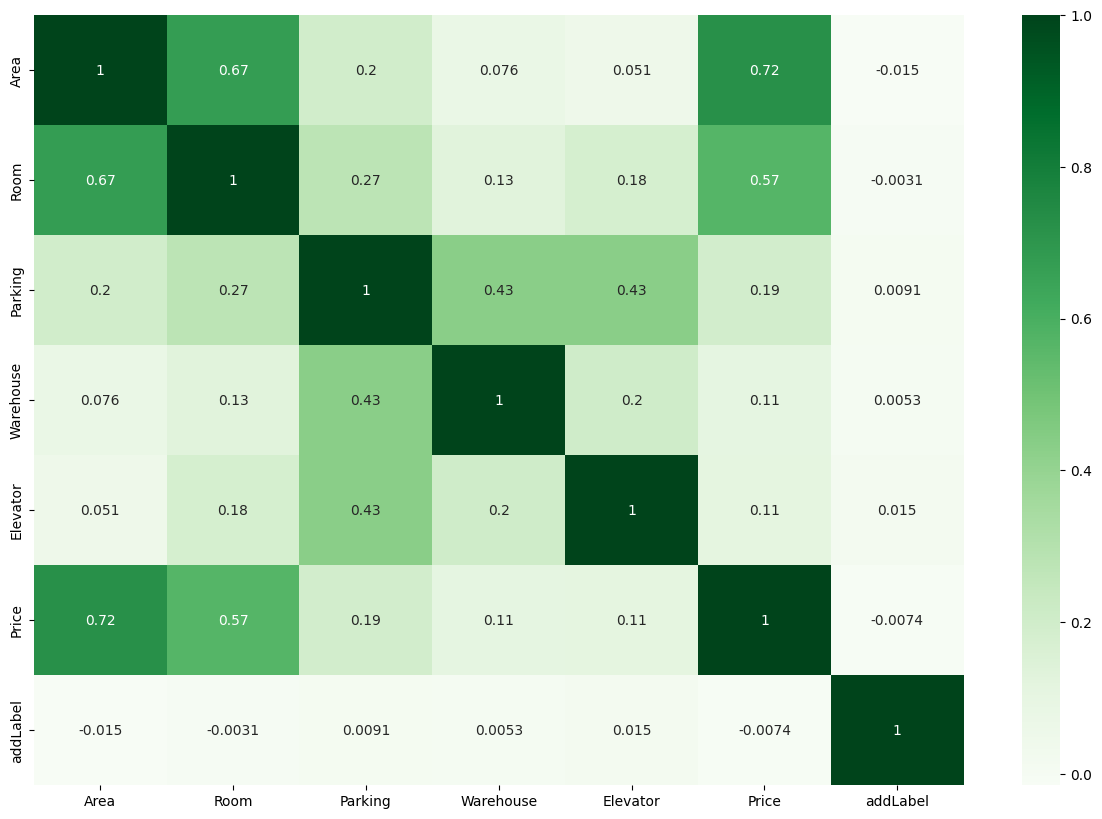

In [166]:
df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
#import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

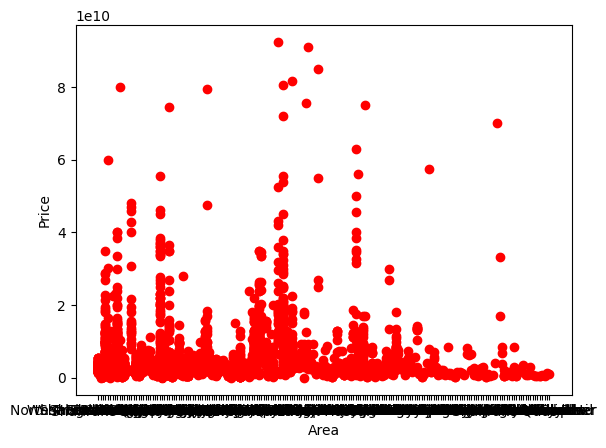

In [157]:
plt.scatter(df['Address'], df.Price, color='red')
plt.ylabel('Price')
plt.xlabel('Area')
plt.show()

In [95]:
#from sklearn.linear_model import LinearRegression

x = df2.iloc[:, [0,1,2,3,4,7]].values                                  
y = df2["Price"].values.reshape(-1,1)

In [98]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
std_scaler = StandardScaler().fit(x)
x = std_scaler.transform(x)

In [104]:
poly_transformer = PolynomialFeatures(degree=2)
poly_transformer.fit(x_train)
poly_features = poly_transformer.transform(x_train)

In [106]:
model = LogisticRegression()
model.fit(poly_features, y_train)

/run/media/cataphract/data/projects/ML_training/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/run/media/cataphract/data/projects/ML_training/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [110]:
from flaml import AutoML
automl = AutoML(task='regression', time_budget=60)
automl.fit(x_train, y_train)


[flaml.automl.automl: 03-04 00:23:39] {2726} INFO - task = regression
[flaml.automl.automl: 03-04 00:23:39] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-04 00:23:39] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-04 00:23:39] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-04 00:23:39] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-04 00:23:39] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-04 00:23:43] {3472} INFO - Estimated sufficient time budget=37138s. Estimated necessary time budget=262s.
[flaml.automl.automl: 03-04 00:23:43] {3519} INFO -  at 3.8s,	estimator lgbm's best error=0.6742,	best estimator lgbm's best error=0.6742
[flaml.automl.automl: 03-04 00:23:43] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-04 00:23:48] {3519} INFO -  at 8.7s,	estimator lgbm's best error=0.6742,	best estima

In [111]:
y_pred = automl.predict(x_test)
r2_score(y_test, y_pred)

0.7393530807518969

In [107]:
model.score(x_train, y_train)


ValueError: X has 6 features, but LogisticRegression is expecting 28 features as input.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3479 entries, 0 to 2802
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3473 non-null   float64
 1   Room       3473 non-null   float64
 2   Parking    3473 non-null   object 
 3   Warehouse  3473 non-null   object 
 4   Elevator   3473 non-null   object 
 5   Address    3450 non-null   object 
 6   Price      3473 non-null   float64
 7   addLabel   3473 non-null   float64
dtypes: float64(4), object(4)
memory usage: 244.6+ KB


In [88]:
nans = df['Address'].isna()
df1 = df[~nans]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3450 non-null   float64
 1   Room       3450 non-null   float64
 2   Parking    3450 non-null   object 
 3   Warehouse  3450 non-null   object 
 4   Elevator   3450 non-null   object 
 5   Address    3450 non-null   object 
 6   Price      3450 non-null   float64
 7   addLabel   3444 non-null   float64
dtypes: float64(4), object(4)
memory usage: 242.6+ KB


In [90]:
nans = df1['addLabel'].isna()
df2 = df1[~nans]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3444 entries, 0 to 3472
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3444 non-null   float64
 1   Room       3444 non-null   float64
 2   Parking    3444 non-null   object 
 3   Warehouse  3444 non-null   object 
 4   Elevator   3444 non-null   object 
 5   Address    3444 non-null   object 
 6   Price      3444 non-null   float64
 7   addLabel   3444 non-null   float64
dtypes: float64(4), object(4)
memory usage: 242.2+ KB


In [92]:
df2['Parking'] = df2['Parking'].astype(bool)
df2['Warehouse'] = df2['Warehouse'].astype(bool)
df2['Elevator'] = df2['Elevator'].astype(bool)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3444 entries, 0 to 3472
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3444 non-null   float64
 1   Room       3444 non-null   float64
 2   Parking    3444 non-null   bool   
 3   Warehouse  3444 non-null   bool   
 4   Elevator   3444 non-null   bool   
 5   Address    3444 non-null   object 
 6   Price      3444 non-null   float64
 7   addLabel   3444 non-null   float64
dtypes: bool(3), float64(4), object(1)
memory usage: 171.5+ KB


/tmp/ipykernel_1892861/3725862547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Parking'] = df2['Parking'].astype(bool)
/tmp/ipykernel_1892861/3725862547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Warehouse'] = df2['Warehouse'].astype(bool)
/tmp/ipykernel_1892861/3725862547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda